# Banco Santander 데이터 실습

## 전처리

In [91]:
# 모듈 임포트
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.optimizers import Adam

In [92]:
# 데이터 로드
raw_data = pd.read_csv('/content/datasets/SAN.csv')
print(raw_data.head())
print(raw_data.info())

         Date  Open  High   Low  Close  Adj Close    Volume
0  2020-06-15  2.37  2.46  2.36   2.44       2.44  11567100
1  2020-06-16  2.57  2.60  2.46   2.51       2.51  13775400
2  2020-06-17  2.53  2.53  2.46   2.47       2.47   9695200
3  2020-06-18  2.40  2.46  2.39   2.41       2.41   6438900
4  2020-06-19  2.45  2.46  2.34   2.37       2.37   9668700
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 251 entries, 0 to 250
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       251 non-null    object 
 1   Open       251 non-null    float64
 2   High       251 non-null    float64
 3   Low        251 non-null    float64
 4   Close      251 non-null    float64
 5   Adj Close  251 non-null    float64
 6   Volume     251 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 13.9+ KB
None


In [93]:
# date 컬럼 날짜 데이터 type으로 변환
raw_data['Date'] = pd.to_datetime(raw_data['Date'])
raw_data.set_index('Date', inplace=True)

print(raw_data.head())

            Open  High   Low  Close  Adj Close    Volume
Date                                                    
2020-06-15  2.37  2.46  2.36   2.44       2.44  11567100
2020-06-16  2.57  2.60  2.46   2.51       2.51  13775400
2020-06-17  2.53  2.53  2.46   2.47       2.47   9695200
2020-06-18  2.40  2.46  2.39   2.41       2.41   6438900
2020-06-19  2.45  2.46  2.34   2.37       2.37   9668700


In [94]:
# 5개 컬럼만 사용
data = raw_data[['Open', 'High', 'Low', 'Close', 'Volume']]

print(data.head())
print(data.tail())
print(data.info())
print(data.shape)

            Open  High   Low  Close    Volume
Date                                         
2020-06-15  2.37  2.46  2.36   2.44  11567100
2020-06-16  2.57  2.60  2.46   2.51  13775400
2020-06-17  2.53  2.53  2.46   2.47   9695200
2020-06-18  2.40  2.46  2.39   2.41   6438900
2020-06-19  2.45  2.46  2.34   2.37   9668700
            Open  High   Low  Close    Volume
Date                                         
2021-06-07  4.21  4.25  4.21   4.24   2674000
2021-06-08  4.14  4.18  4.12   4.16   2586000
2021-06-09  4.15  4.38  4.12   4.20  35134600
2021-06-10  4.26  4.29  4.22   4.24  21538900
2021-06-11  4.20  4.24  4.18   4.22   6655700
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 251 entries, 2020-06-15 to 2021-06-11
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    251 non-null    float64
 1   High    251 non-null    float64
 2   Low     251 non-null    float64
 3   Close   251 non-null    float64
 4   Volume

In [95]:
# nan 값 없으므로 결측치 제거 X
# data = data.dropna()
# print(data.info())

In [96]:
# 스케일링
from sklearn.preprocessing import MinMaxScaler
minmaxscaler = MinMaxScaler()

scaled_data = minmaxscaler.fit_transform(data)

print(scaled_data[:5])
print(scaled_data.shape)

[[0.23170732 0.24409449 0.23577236 0.26104418 0.29188663]
 [0.31300813 0.2992126  0.27642276 0.28915663 0.35823761]
 [0.29674797 0.27165354 0.27642276 0.27309237 0.23564318]
 [0.24390244 0.24409449 0.24796748 0.24899598 0.1378038 ]
 [0.26422764 0.24409449 0.22764228 0.23293173 0.23484696]]
(251, 5)


In [97]:
# 각 길이가 28인 시퀀스로 만듦
sequence_X = []
sequence_Y = []
for i in range(len(scaled_data) - 28):
    _x = scaled_data[i:i+28]
    _y = scaled_data[i+28][3]
    if i is 0:
        print(_x, '->', _y)
    sequence_X.append(_x)
    sequence_Y.append(_y)

[[0.23170732 0.24409449 0.23577236 0.26104418 0.29188663]
 [0.31300813 0.2992126  0.27642276 0.28915663 0.35823761]
 [0.29674797 0.27165354 0.27642276 0.27309237 0.23564318]
 [0.24390244 0.24409449 0.24796748 0.24899598 0.1378038 ]
 [0.26422764 0.24409449 0.22764228 0.23293173 0.23484696]
 [0.23170732 0.22047244 0.23170732 0.23694779 0.11378789]
 [0.28861789 0.27165354 0.2804878  0.2811245  0.16882649]
 [0.25609756 0.23622047 0.24390244 0.24096386 0.13981089]
 [0.2398374  0.2519685  0.24390244 0.27710843 0.14557375]
 [0.24796748 0.22834646 0.23170732 0.22891566 0.11153142]
 [0.25609756 0.2519685  0.25203252 0.26506024 0.1728016 ]
 [0.23170732 0.23228346 0.23577236 0.24899598 0.12366107]
 [0.24390244 0.23622047 0.24390244 0.24096386 0.1309022 ]
 [0.30894309 0.29527559 0.29268293 0.28514056 0.18389465]
 [0.32926829 0.31496063 0.32520325 0.32931727 0.1183489 ]
 [0.30487805 0.28346457 0.29268293 0.28915663 0.08401814]
 [0.27642276 0.26771654 0.27642276 0.2811245  0.05566055]
 [0.2804878  0

In [98]:
# np.array화
sequence_X = np.array(sequence_X)
sequence_Y = np.array(sequence_Y)

print(sequence_X[0])
print(sequence_Y[0])
print(sequence_X.shape)
print(sequence_Y.shape)

[[0.23170732 0.24409449 0.23577236 0.26104418 0.29188663]
 [0.31300813 0.2992126  0.27642276 0.28915663 0.35823761]
 [0.29674797 0.27165354 0.27642276 0.27309237 0.23564318]
 [0.24390244 0.24409449 0.24796748 0.24899598 0.1378038 ]
 [0.26422764 0.24409449 0.22764228 0.23293173 0.23484696]
 [0.23170732 0.22047244 0.23170732 0.23694779 0.11378789]
 [0.28861789 0.27165354 0.2804878  0.2811245  0.16882649]
 [0.25609756 0.23622047 0.24390244 0.24096386 0.13981089]
 [0.2398374  0.2519685  0.24390244 0.27710843 0.14557375]
 [0.24796748 0.22834646 0.23170732 0.22891566 0.11153142]
 [0.25609756 0.2519685  0.25203252 0.26506024 0.1728016 ]
 [0.23170732 0.23228346 0.23577236 0.24899598 0.12366107]
 [0.24390244 0.23622047 0.24390244 0.24096386 0.1309022 ]
 [0.30894309 0.29527559 0.29268293 0.28514056 0.18389465]
 [0.32926829 0.31496063 0.32520325 0.32931727 0.1183489 ]
 [0.30487805 0.28346457 0.29268293 0.28915663 0.08401814]
 [0.27642276 0.26771654 0.27642276 0.2811245  0.05566055]
 [0.2804878  0

In [99]:
# train set, test set 분리
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(
    sequence_X, sequence_Y, test_size=0.2,
    random_state=77)

print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(178, 28, 5)
(178,)
(45, 28, 5)
(45,)


## 모델 1. LSTM

In [100]:
# 모델링
model = Sequential()
model.add(LSTM(50, 
    input_shape=(X_train.shape[1],X_train.shape[2]),
    activation='tanh'))
model.add(Flatten())
model.add(Dense(1))
model.compile(loss='mse', optimizer='adam')
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_3 (LSTM)                (None, 50)                11200     
_________________________________________________________________
flatten_5 (Flatten)          (None, 50)                0         
_________________________________________________________________
dense_13 (Dense)             (None, 1)                 51        
Total params: 11,251
Trainable params: 11,251
Non-trainable params: 0
_________________________________________________________________


In [101]:
# 모델 학습
fit_hist = model.fit(X_train, Y_train, 
    epochs=350, validation_data=(X_test, Y_test),
    shuffle=False)

Epoch 1/350
6/6 [==============================] - 2s 103ms/step - loss: 0.1831 - val_loss: 0.0242
Epoch 2/350
6/6 [==============================] - 0s 18ms/step - loss: 0.0193 - val_loss: 0.0341
Epoch 3/350
6/6 [==============================] - 0s 21ms/step - loss: 0.0288 - val_loss: 0.0112
Epoch 4/350
6/6 [==============================] - 0s 19ms/step - loss: 0.0068 - val_loss: 0.0077
Epoch 5/350
6/6 [==============================] - 0s 18ms/step - loss: 0.0078 - val_loss: 0.0093
Epoch 6/350
6/6 [==============================] - 0s 19ms/step - loss: 0.0067 - val_loss: 0.0051
Epoch 7/350
6/6 [==============================] - 0s 19ms/step - loss: 0.0038 - val_loss: 0.0045
Epoch 8/350
6/6 [==============================] - 0s 18ms/step - loss: 0.0039 - val_loss: 0.0043
Epoch 9/350
6/6 [==============================] - 0s 19ms/step - loss: 0.0032 - val_loss: 0.0039
Epoch 10/350
6/6 [==============================] - 0s 18ms/step - loss: 0.0028 - val_loss: 0.0041
Epoch 11/350
6/6 [

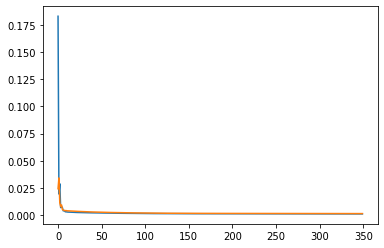

In [102]:
# 결과 plot
plt.plot(fit_hist.history['loss'])
plt.plot(fit_hist.history['val_loss'])
plt.show()

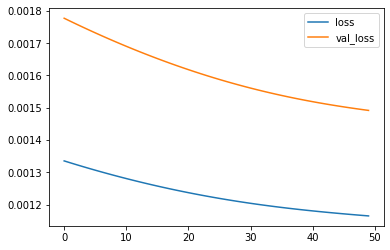

In [103]:
# 과적합 일어나는 구간 알아보기
plt.plot(fit_hist.history['loss'][100:150], label='loss')
plt.plot(fit_hist.history['val_loss'][100:150], label='val_loss')
plt.legend()
plt.show()

In [104]:
# 정확도 추출
predict = model.predict(X_test)

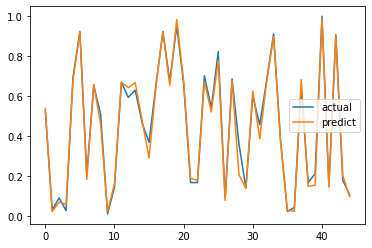

In [105]:
plt.plot(Y_test, label='actual')
plt.plot(predict, label='predict')
plt.legend()
plt.show()

In [106]:
test_data = raw_data[['Open', 'High', 'Low', 'Close', 'Volume']]
print(test_data.head())
print(test_data.info())
print(test_data.shape)

            Open  High   Low  Close    Volume
Date                                         
2020-06-15  2.37  2.46  2.36   2.44  11567100
2020-06-16  2.57  2.60  2.46   2.51  13775400
2020-06-17  2.53  2.53  2.46   2.47   9695200
2020-06-18  2.40  2.46  2.39   2.41   6438900
2020-06-19  2.45  2.46  2.34   2.37   9668700
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 251 entries, 2020-06-15 to 2021-06-11
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    251 non-null    float64
 1   High    251 non-null    float64
 2   Low     251 non-null    float64
 3   Close   251 non-null    float64
 4   Volume  251 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 11.8 KB
None
(251, 5)


In [107]:
scaled_test_data = minmaxscaler.transform(test_data)
print(scaled_test_data[-5:])
print(scaled_test_data.shape)

[[0.9796748  0.9488189  0.98780488 0.98393574 0.02468294]
 [0.95121951 0.92125984 0.95121951 0.95180723 0.02203887]
 [0.95528455 1.         0.95121951 0.96787149 1.        ]
 [1.         0.96456693 0.99186992 0.98393574 0.59150114]
 [0.97560976 0.94488189 0.97560976 0.97590361 0.14431782]]
(251, 5)


In [108]:
scaled_test_data[39][3]

0.1767068273092368

In [109]:
orginal_value = minmaxscaler.inverse_transform(scaled_test_data[39].reshape(-1,5))
print(orginal_value)

[[2.1900e+00 2.2300e+00 2.1900e+00 2.2300e+00 6.0821e+06]]


In [110]:
print(test_data.iloc[39])

Open            2.19
High            2.23
Low             2.19
Close           2.23
Volume    6082100.00
Name: 2020-08-10 00:00:00, dtype: float64


In [111]:
sequence_testdata_X = []
sequence_testdata_Y = []
for i in range(len(scaled_test_data) - 28):
    _x = scaled_test_data[i:i+28]
    _y = scaled_test_data[i+28][3]
    sequence_testdata_X.append(_x)
    sequence_testdata_Y.append(_y)
sequence_testdata_X = np.array(sequence_testdata_X)
sequence_testdata_Y = np.array(sequence_testdata_Y)
print(sequence_testdata_X.shape)
print(sequence_testdata_Y.shape)

(223, 28, 5)
(223,)


In [112]:
predict = model.predict(sequence_testdata_X)

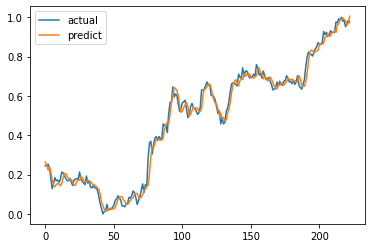

In [113]:
plt.plot(sequence_testdata_Y, label='actual')
plt.plot(predict, label='predict')
plt.legend()
plt.show()

In [114]:
last_28_data = scaled_test_data[-28:]
last_28_data.shape

(28, 5)

In [115]:
last_28_data = last_28_data.reshape(-1,28,5)
last_28_data.shape

(1, 28, 5)

In [116]:
today_close = model.predict(last_28_data)
print(today_close)

[[0.99670964]]


In [117]:
minmaxscaler_close = MinMaxScaler()
_ = minmaxscaler_close.fit_transform(data[['Close']])
today_close = minmaxscaler_close.inverse_transform(today_close)
print(today_close)

[[4.2718067]]


## 모델 2.SimpleRNN

In [118]:
# 모델링
model = Sequential()

model.add(SimpleRNN(50, 
               input_shape=(X_train.shape[1], X_train.shape[2]), # 좀 더 간편하게 아예 인덱스 번호를 지정
                            activation='tanh'))

model.add(Flatten())

model.add(Dense(128))

model.add(Dense(64))

model.add(Dense(32))

model.add(Dense(16))

model.add(Dense(1))

# 모델 컴파일
model.compile(loss='mse', optimizer='Adam')

# 모델 확인
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn_1 (SimpleRNN)     (None, 50)                2800      
_________________________________________________________________
flatten_6 (Flatten)          (None, 50)                0         
_________________________________________________________________
dense_14 (Dense)             (None, 128)               6528      
_________________________________________________________________
dense_15 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_16 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_17 (Dense)             (None, 16)                528       
_________________________________________________________________
dense_18 (Dense)             (None, 1)                

In [119]:
# 모델 학습
fit_hist = model.fit(X_train, Y_train, 
    epochs=350, validation_data=(X_test, Y_test),
    shuffle=False)

Epoch 1/350
6/6 [==============================] - 1s 50ms/step - loss: 0.6303 - val_loss: 0.0809
Epoch 2/350
6/6 [==============================] - 0s 11ms/step - loss: 0.1216 - val_loss: 0.0564
Epoch 3/350
6/6 [==============================] - 0s 12ms/step - loss: 0.0503 - val_loss: 0.0622
Epoch 4/350
6/6 [==============================] - 0s 10ms/step - loss: 0.0253 - val_loss: 0.0362
Epoch 5/350
6/6 [==============================] - 0s 12ms/step - loss: 0.0221 - val_loss: 0.0100
Epoch 6/350
6/6 [==============================] - 0s 17ms/step - loss: 0.0110 - val_loss: 0.0128
Epoch 7/350
6/6 [==============================] - 0s 11ms/step - loss: 0.0063 - val_loss: 0.0101
Epoch 8/350
6/6 [==============================] - 0s 15ms/step - loss: 0.0063 - val_loss: 0.0063
Epoch 9/350
6/6 [==============================] - 0s 12ms/step - loss: 0.0045 - val_loss: 0.0065
Epoch 10/350
6/6 [==============================] - 0s 11ms/step - loss: 0.0034 - val_loss: 0.0058
Epoch 11/350
6/6 [=

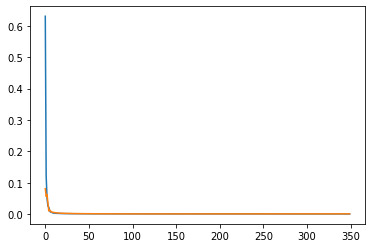

In [120]:
# 결과 plot
plt.plot(fit_hist.history['loss'])
plt.plot(fit_hist.history['val_loss'])
plt.show()

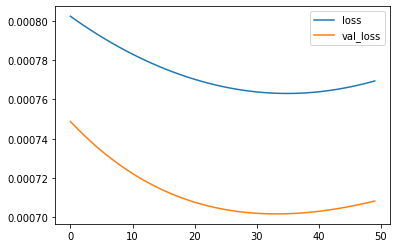

In [121]:
# 과적합 일어나는 구간 알아보기
plt.plot(fit_hist.history['loss'][100:150], label='loss')
plt.plot(fit_hist.history['val_loss'][100:150], label='val_loss')
plt.legend()
plt.show()

In [122]:
# 정확도 추출
predict = model.predict(X_test)

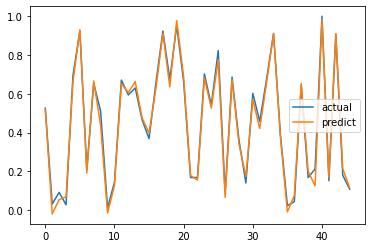

In [123]:
plt.plot(Y_test, label='actual')
plt.plot(predict, label='predict')
plt.legend()
plt.show()

In [124]:
test_data = raw_data[['Open', 'High', 'Low', 'Close', 'Volume']]
print(test_data.head())
print(test_data.info())
print(test_data.shape)

            Open  High   Low  Close    Volume
Date                                         
2020-06-15  2.37  2.46  2.36   2.44  11567100
2020-06-16  2.57  2.60  2.46   2.51  13775400
2020-06-17  2.53  2.53  2.46   2.47   9695200
2020-06-18  2.40  2.46  2.39   2.41   6438900
2020-06-19  2.45  2.46  2.34   2.37   9668700
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 251 entries, 2020-06-15 to 2021-06-11
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    251 non-null    float64
 1   High    251 non-null    float64
 2   Low     251 non-null    float64
 3   Close   251 non-null    float64
 4   Volume  251 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 11.8 KB
None
(251, 5)


In [125]:
scaled_test_data = minmaxscaler.transform(test_data)
print(scaled_test_data[-5:])
print(scaled_test_data.shape)

[[0.9796748  0.9488189  0.98780488 0.98393574 0.02468294]
 [0.95121951 0.92125984 0.95121951 0.95180723 0.02203887]
 [0.95528455 1.         0.95121951 0.96787149 1.        ]
 [1.         0.96456693 0.99186992 0.98393574 0.59150114]
 [0.97560976 0.94488189 0.97560976 0.97590361 0.14431782]]
(251, 5)


In [126]:
scaled_test_data[39][3]

0.1767068273092368

In [127]:
orginal_value = minmaxscaler.inverse_transform(scaled_test_data[39].reshape(-1,5))
print(orginal_value)

[[2.1900e+00 2.2300e+00 2.1900e+00 2.2300e+00 6.0821e+06]]


In [128]:
print(test_data.iloc[39])

Open            2.19
High            2.23
Low             2.19
Close           2.23
Volume    6082100.00
Name: 2020-08-10 00:00:00, dtype: float64


In [129]:
sequence_testdata_X = []
sequence_testdata_Y = []
for i in range(len(scaled_test_data) - 28):
    _x = scaled_test_data[i:i+28]
    _y = scaled_test_data[i+28][3]
    sequence_testdata_X.append(_x)
    sequence_testdata_Y.append(_y)
sequence_testdata_X = np.array(sequence_testdata_X)
sequence_testdata_Y = np.array(sequence_testdata_Y)
print(sequence_testdata_X.shape)
print(sequence_testdata_Y.shape)

(223, 28, 5)
(223,)


In [130]:
predict = model.predict(sequence_testdata_X)

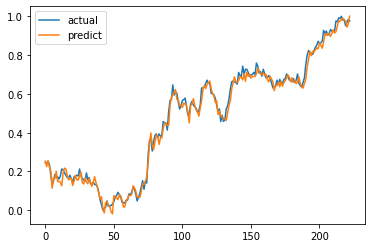

In [131]:
plt.plot(sequence_testdata_Y, label='actual')
plt.plot(predict, label='predict')
plt.legend()
plt.show()

In [132]:
last_28_data = scaled_test_data[-28:]
last_28_data.shape

(28, 5)

In [133]:
last_28_data = last_28_data.reshape(-1,28,5)
last_28_data.shape

(1, 28, 5)

In [134]:
today_close = model.predict(last_28_data)
print(today_close)

[[1.0026186]]


In [135]:
minmaxscaler_close = MinMaxScaler()
_ = minmaxscaler_close.fit_transform(data[['Close']])
today_close = minmaxscaler_close.inverse_transform(today_close)
print(today_close)

[[4.2865205]]


## 모델 3. GRU

- 데이터 양이 적을 때는 매개 변수 양이 적은 GRU 데이터 양이 많을 때는 LSTM  
  
- 학습 속도는 LSTM보다 빠르지만 성능은 비슷

In [136]:
# 모델링
model = Sequential()

model.add(GRU(50, 
               input_shape=(X_train.shape[1], X_train.shape[2]), # 좀 더 간편하게 아예 인덱스 번호를 지정
                            activation='tanh'))

model.add(Flatten())

model.add(Dense(128))

model.add(Dense(64))

model.add(Dense(32))

model.add(Dense(16))

model.add(Dense(1))

# 모델 컴파일
model.compile(loss='mse', optimizer='Adam')

# 모델 확인
model.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru_1 (GRU)                  (None, 50)                8550      
_________________________________________________________________
flatten_7 (Flatten)          (None, 50)                0         
_________________________________________________________________
dense_19 (Dense)             (None, 128)               6528      
_________________________________________________________________
dense_20 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_21 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_22 (Dense)             (None, 16)                528       
_________________________________________________________________
dense_23 (Dense)             (None, 1)                

In [137]:
# 모델 학습
fit_hist = model.fit(X_train, Y_train, 
    epochs=350, validation_data=(X_test, Y_test),
    shuffle=False)

Epoch 1/350
6/6 [==============================] - 2s 112ms/step - loss: 0.0769 - val_loss: 0.0175
Epoch 2/350
6/6 [==============================] - 0s 19ms/step - loss: 0.0163 - val_loss: 0.0326
Epoch 3/350
6/6 [==============================] - 0s 22ms/step - loss: 0.0170 - val_loss: 0.0037
Epoch 4/350
6/6 [==============================] - 0s 21ms/step - loss: 0.0087 - val_loss: 0.0038
Epoch 5/350
6/6 [==============================] - 0s 20ms/step - loss: 0.0028 - val_loss: 0.0056
Epoch 6/350
6/6 [==============================] - 0s 19ms/step - loss: 0.0041 - val_loss: 0.0014
Epoch 7/350
6/6 [==============================] - 0s 21ms/step - loss: 0.0023 - val_loss: 0.0022
Epoch 8/350
6/6 [==============================] - 0s 20ms/step - loss: 0.0016 - val_loss: 0.0021
Epoch 9/350
6/6 [==============================] - 0s 19ms/step - loss: 0.0018 - val_loss: 0.0015
Epoch 10/350
6/6 [==============================] - 0s 20ms/step - loss: 0.0015 - val_loss: 0.0015
Epoch 11/350
6/6 [

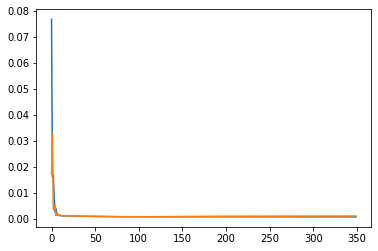

In [138]:
# 결과 plot
plt.plot(fit_hist.history['loss'])
plt.plot(fit_hist.history['val_loss'])
plt.show()

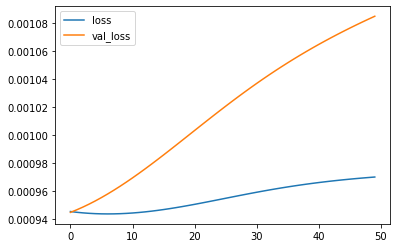

In [139]:
# 과적합 일어나는 구간 알아보기
plt.plot(fit_hist.history['loss'][100:150], label='loss')
plt.plot(fit_hist.history['val_loss'][100:150], label='val_loss')
plt.legend()
plt.show()

In [140]:
# 정확도 추출
predict = model.predict(X_test)

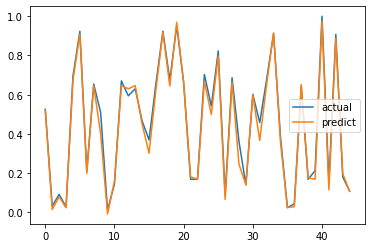

In [141]:
plt.plot(Y_test, label='actual')
plt.plot(predict, label='predict')
plt.legend()
plt.show()

In [142]:
test_data = raw_data[['Open', 'High', 'Low', 'Close', 'Volume']]
print(test_data.head())
print(test_data.info())
print(test_data.shape)

            Open  High   Low  Close    Volume
Date                                         
2020-06-15  2.37  2.46  2.36   2.44  11567100
2020-06-16  2.57  2.60  2.46   2.51  13775400
2020-06-17  2.53  2.53  2.46   2.47   9695200
2020-06-18  2.40  2.46  2.39   2.41   6438900
2020-06-19  2.45  2.46  2.34   2.37   9668700
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 251 entries, 2020-06-15 to 2021-06-11
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    251 non-null    float64
 1   High    251 non-null    float64
 2   Low     251 non-null    float64
 3   Close   251 non-null    float64
 4   Volume  251 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 11.8 KB
None
(251, 5)


In [143]:
scaled_test_data = minmaxscaler.transform(test_data)
print(scaled_test_data[-5:])
print(scaled_test_data.shape)

[[0.9796748  0.9488189  0.98780488 0.98393574 0.02468294]
 [0.95121951 0.92125984 0.95121951 0.95180723 0.02203887]
 [0.95528455 1.         0.95121951 0.96787149 1.        ]
 [1.         0.96456693 0.99186992 0.98393574 0.59150114]
 [0.97560976 0.94488189 0.97560976 0.97590361 0.14431782]]
(251, 5)


In [144]:
scaled_test_data[39][3]

0.1767068273092368

In [145]:
orginal_value = minmaxscaler.inverse_transform(scaled_test_data[39].reshape(-1,5))
print(orginal_value)

[[2.1900e+00 2.2300e+00 2.1900e+00 2.2300e+00 6.0821e+06]]


In [146]:
print(test_data.iloc[39])

Open            2.19
High            2.23
Low             2.19
Close           2.23
Volume    6082100.00
Name: 2020-08-10 00:00:00, dtype: float64


In [147]:
sequence_testdata_X = []
sequence_testdata_Y = []
for i in range(len(scaled_test_data) - 28):
    _x = scaled_test_data[i:i+28]
    _y = scaled_test_data[i+28][3]
    sequence_testdata_X.append(_x)
    sequence_testdata_Y.append(_y)
sequence_testdata_X = np.array(sequence_testdata_X)
sequence_testdata_Y = np.array(sequence_testdata_Y)
print(sequence_testdata_X.shape)
print(sequence_testdata_Y.shape)

(223, 28, 5)
(223,)


In [148]:
predict = model.predict(sequence_testdata_X)

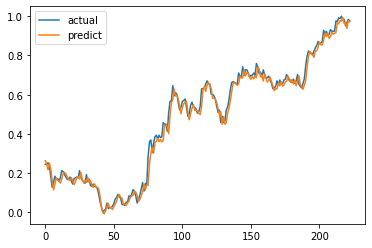

In [149]:
plt.plot(sequence_testdata_Y, label='actual')
plt.plot(predict, label='predict')
plt.legend()
plt.show()

In [150]:
last_28_data = scaled_test_data[-28:]
last_28_data.shape

(28, 5)

In [151]:
last_28_data = last_28_data.reshape(-1,28,5)
last_28_data.shape

(1, 28, 5)

In [152]:
today_close = model.predict(last_28_data)
print(today_close)

[[0.9832832]]


In [153]:
minmaxscaler_close = MinMaxScaler()
_ = minmaxscaler_close.fit_transform(data[['Close']])
today_close = minmaxscaler_close.inverse_transform(today_close)
print(today_close)

[[4.238375]]


# 오늘 종가 예측

In [154]:
test_data = raw_data[['Open', 'High', 'Low', 'Close', 'Volume']]
print(test_data.head())
print(test_data.info())
print(test_data.shape)

            Open  High   Low  Close    Volume
Date                                         
2020-06-15  2.37  2.46  2.36   2.44  11567100
2020-06-16  2.57  2.60  2.46   2.51  13775400
2020-06-17  2.53  2.53  2.46   2.47   9695200
2020-06-18  2.40  2.46  2.39   2.41   6438900
2020-06-19  2.45  2.46  2.34   2.37   9668700
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 251 entries, 2020-06-15 to 2021-06-11
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    251 non-null    float64
 1   High    251 non-null    float64
 2   Low     251 non-null    float64
 3   Close   251 non-null    float64
 4   Volume  251 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 11.8 KB
None
(251, 5)


In [155]:
scaled_test_data = minmaxscaler.transform(test_data)
print(scaled_test_data[-5:])
print(scaled_test_data.shape)

[[0.9796748  0.9488189  0.98780488 0.98393574 0.02468294]
 [0.95121951 0.92125984 0.95121951 0.95180723 0.02203887]
 [0.95528455 1.         0.95121951 0.96787149 1.        ]
 [1.         0.96456693 0.99186992 0.98393574 0.59150114]
 [0.97560976 0.94488189 0.97560976 0.97590361 0.14431782]]
(251, 5)


In [156]:
scaled_test_data[39][3]

0.1767068273092368

In [157]:
orginal_value = minmaxscaler.inverse_transform(scaled_test_data[39].reshape(-1,5))
print(orginal_value)

[[2.1900e+00 2.2300e+00 2.1900e+00 2.2300e+00 6.0821e+06]]


In [158]:
print(test_data.iloc[39])

Open            2.19
High            2.23
Low             2.19
Close           2.23
Volume    6082100.00
Name: 2020-08-10 00:00:00, dtype: float64


In [159]:
sequence_testdata_X = []
sequence_testdata_Y = []
for i in range(len(scaled_test_data) - 28):
    _x = scaled_test_data[i:i+28]
    _y = scaled_test_data[i+28][3]
    sequence_testdata_X.append(_x)
    sequence_testdata_Y.append(_y)
sequence_testdata_X = np.array(sequence_testdata_X)
sequence_testdata_Y = np.array(sequence_testdata_Y)
print(sequence_testdata_X.shape)
print(sequence_testdata_Y.shape)

(223, 28, 5)
(223,)


In [160]:
predict = model.predict(sequence_testdata_X)

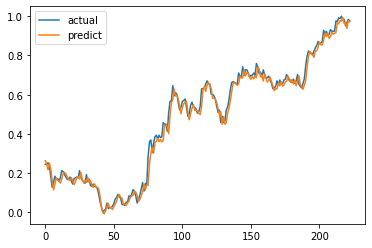

In [161]:
plt.plot(sequence_testdata_Y, label='actual')
plt.plot(predict, label='predict')
plt.legend()
plt.show()

In [162]:
last_28_data = scaled_test_data[-28:]
last_28_data.shape

(28, 5)

In [163]:
last_28_data = last_28_data.reshape(-1,28,5)
last_28_data.shape

(1, 28, 5)

In [164]:
today_close = model.predict(last_28_data)
print(today_close)

[[0.9832832]]


In [165]:
minmaxscaler_close = MinMaxScaler()
_ = minmaxscaler_close.fit_transform(data[['Close']])
today_close = minmaxscaler_close.inverse_transform(today_close)
print(today_close)

[[4.238375]]
